# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.backend import clear_session
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)

In [ ]:
print(y_test.shape)

In [ ]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

# Iterate over the classes
for i in range(10):
    # Get indices of images belonging to the current class
    class_indices = np.where(y_train == i)[0]

    # Select 10 random images from the current class
    random_indices = np.random.choice(class_indices, size=10, replace=False)

    # Plot the images
    for j, index in enumerate(random_indices):
        axes[i, j].imshow(x_train[index])
        axes[i, j].axis('off')

    # Set the title for the first column of each row
    axes[i, 0].set_ylabel(class_labels[i], rotation=0, size='large', labelpad=20)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Define the model

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])


# Print the model summary
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
from tensorflow.keras.optimizers import SGD
# Compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.1621 - loss: 2.2426 - val_accuracy: 0.3113 - val_loss: 1.9350
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.3311 - loss: 1.8938 - val_accuracy: 0.4087 - val_loss: 1.6995
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.4095 - loss: 1.6755 - val_accuracy: 0.4617 - val_loss: 1.5255
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.4677 - loss: 1.5067 - val_accuracy: 0.4936 - val_loss: 1.4333
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4998 - loss: 1.4269 - val_accuracy: 0.5139 - val_loss: 1.3777
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5274 - loss: 1.3451 - val_accuracy: 0.5430 - val_loss: 1.3065
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5524 - loss: 1.2879 - val_accuracy: 0.5638 - val_loss: 1.2555
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5670 - loss: 1.2467 - val_accuracy: 0.5788 - v

*   Plot the cross entropy loss curve and the accuracy curve

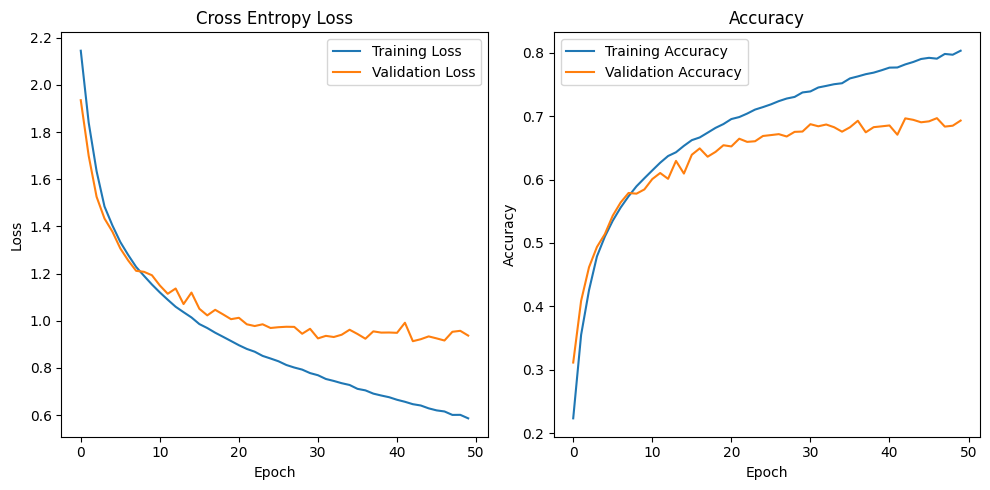

In [11]:
# Your code here :
# Plot the cross entropy loss curve and the accuracy curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_val = x_train / 255.0, x_val / 255.0

# Define the deeper VGG-inspired architecture
model = Sequential([
    # First block: Two Conv2D layers with 32 filters and 3x3 kernel size, followed by max-pooling
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flatten the output of the previous layer
    Flatten(),

    # Dense layer with 128 units
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer with 10 units (for 10 classes) and softmax activation
    Dense(10, activation='softmax')
])

# Print the model summary to check the architecture
model.summary()





*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6, nesterov=True)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with batch size of 512 for 50 epochs
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
# Your code here :
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :
# Load CIFAR-10 test dataset
(x_test, y_test) = tf.keras.datasets.cifar10.load_data()[1]

# Make predictions on the test data
y_pred = model.predict(x_test)

# Get the predicted class labels (the class with the highest probability)
y_pred_classes = y_pred.argmax(axis=-1)

In [ ]:
pip install scikit-learn matplotlib seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix for CIFAR-10 Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=512)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the complete VGG-inspired model for CIFAR-10 with input size of 64x64
model = Sequential([
    # Block 1: Two Conv2D layers with 64 filters, 3x3 kernel, followed by MaxPooling
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 2: Two Conv2D layers with 128 filters, 3x3 kernel, followed by MaxPooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 3: Two Conv2D layers with 256 filters, 3x3 kernel, followed by MaxPooling
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flatten the output of the last Conv2D layer
    Flatten(),

    # Dense layer with 128 units
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer with 10 units for CIFAR-10 classification
    Dense(10, activation='softmax')
])

# Print the model summary to check the architecture
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:


model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load CIFAR-10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize the data to 64x64
x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))

# Normalize the data to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (since we're using categorical_crossentropy)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Train the model for 10 epochs with batch size of 512
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, batch_size=512)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict the output for the test split
y_pred = model.predict(x_test)

# Get the predicted class labels (the class with the highest probability)
y_pred_classes = y_pred.argmax(axis=-1)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix for CIFAR-10 Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Comment on class confusions
print("Confusion Matrix:")
print(cm)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
